In [5]:
import cv2
import sys
from matplotlib import pyplot as plt

imagePath = r'image0.jpg'
dirCascadeFiles = r'../opencv/haarcascades_cuda/'
# Récupération de fichiers préconfigurés : https://github.com/opencv/opencv/tree/3.4/data/haarcascades
cascadefile = dirCascadeFiles + "haarcascade_frontalface_default.xml"
classCascade = cv2.CascadeClassifier(cascadefile)

un peu d'info sur https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html

# Image a analyser

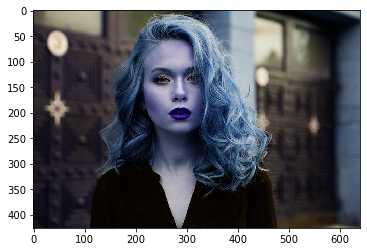

In [6]:
image = cv2.imread(imagePath)
plt.imshow(image)

# Récupération de l'image et conversion Greyscale

Transformations dans l'espace RVB telles que l'ajout / la suppression du canal alpha, l'inversion de l'ordre des canaux, la conversion vers / depuis la couleur RVB 16 bits (R5: G6: B5 ou R5: G5: B5), ainsi que la conversion vers / depuis l'échelle de gris en utilisant:

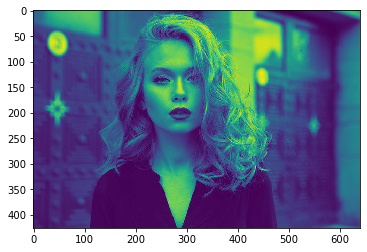

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [9]:
faces = classCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)
print("Il y a {0} visage(s).".format(len(faces)))

Il y a 3 visage(s).


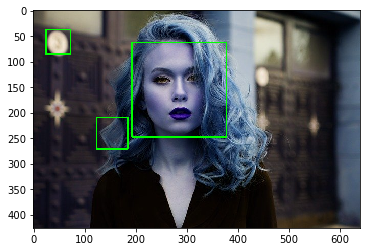

In [10]:
# Dessine des rectangles autour des visages trouvés
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(image)

Aïe il y a deux "visages" en trop semble-t-il

# Changeons de modèle

Il y a 1 visage(s).


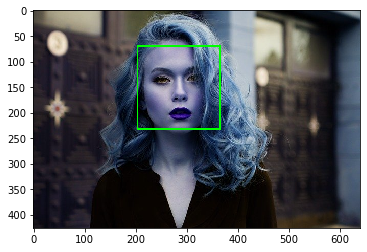

In [11]:
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cascadefile = dirCascadeFiles + "haarcascade_frontalface_alt.xml"
classCascade = cv2.CascadeClassifier(cascadefile)
faces = classCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)
print("Il y a {0} visage(s).".format(len(faces)))
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(image)

C'est bien mieux !

# Découpons le visage que nous avons trouvé

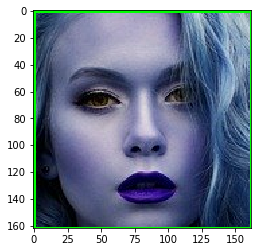

In [12]:
for (x, y, w, h) in faces:
    crop_img = image[y:y+h, x:x+w]
    plt.imshow(crop_img)

... et sauvegardons le dans un fichier !

In [13]:
i=0
for (x, y, w, h) in faces:
    cv2.imwrite('fichier_resultat_' + str(i) + '.jpg', image[y:y+h, x:x+w]) 
    i = i+1

# Essayons sur une nouvelle photo

Il y a 2 visage(s).


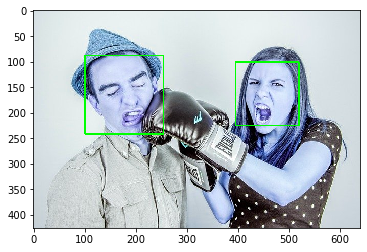

In [26]:
imagePath = r'image3.jpg'
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cascadefile = dirCascadeFiles + "haarcascade_frontalface_default.xml"
classCascade = cv2.CascadeClassifier(cascadefile)
faces = classCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)
print("Il y a {0} visage(s).".format(len(faces)))
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(image)

In [48]:
for i in range(len(faces)):
    print("Cadre du visage N°{0} --> {1}".format(i, faces[i]))

Cadre du visage N°0 --> [396 101 124 124]
Cadre du visage N°1 --> [101  88 154 154]


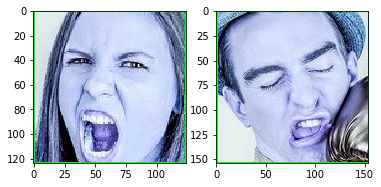

In [39]:
for i in range(len(faces)):
    plt.subplot(1, 2, i+1)
    plt.imshow(image[faces[i][1]:faces[i][1]+faces[i][3], faces[i][0]:faces[i][0]+faces[i][2]])